In [1]:
import numpy as np

x=np.load("variables/x.npy")
y=np.load("variables/y.npy")
x_train=np.load("variables/x_train.npy")
x_test=np.load("variables/x_test.npy")
y_test=np.load("variables/y_test.npy")
y_train=np.load("variables/y_train.npy")

## RANDOM FOREST CLASSIFIER:

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
Random_forest_clf = RandomForestClassifier(random_state=42, n_estimators=10)
Random_forest_clf.fit(x_train, y_train)
y_probas_forest = cross_val_predict(Random_forest_clf, x_train, y_train, cv=3,
                                    method="predict_proba")


### VALIDATION CROISÉE : 

In [3]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
Random_forest_clf_scores = cross_val_score(Random_forest_clf, x_train, 
                                      y_train, cv=10, scoring="accuracy")

display_scores(Random_forest_clf_scores)

Scores: [0.97167139 0.98583569 0.9631728  0.98016997 0.98866856 0.97450425
 0.97733711 0.98583569 0.96590909 0.98295455]
Mean: 0.9776059103785733
Standard deviation: 0.008264770638215345


### GridSearchCV
Afin de trouver les meilleurs paramètres, nous allons utiliser la méthode d'optimisation GridSearchCV.

In [4]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

forest_params = [{'n_estimators': [40, 50, 60, 70], 'max_features': [2, 4, 6, 8, 10]}]

forest_class = RandomForestClassifier(random_state=42)

grid_search_RF = GridSearchCV(forest_class, forest_params, cv = 40, scoring='accuracy')

grid_search_RF.fit(x_train, y_train)

print(grid_search_RF.best_params_)

print(grid_search_RF.best_score_)

{'max_features': 2, 'n_estimators': 70}
0.9926168283963228


In [12]:
best_RF_clf = grid_search_RF.best_estimator_

In [1]:
best_RF_clf_scores = cross_val_score(best_RF_clf, x_train, 
                                      y_train, cv=10, scoring="accuracy")
display_scores(best_RF_clf_scores)

NameError: name 'cross_val_score' is not defined

### Matrice de Confusion

Nous allons maintenant utiliser afin d'étudier les performances de notre système de classification supervisé. Calculons maintenant cette matrice avec notre modèle amélioré.

In [12]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(best_RF_clf, x_train, y_train, cv=3)

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[2953,    3],
       [ 105,  467]], dtype=int64)

### Recall et precision en fonction du seuil
Affichons les valeurs du recall et de la précision en fonction du seuil ainsi que la valeur de la précision en fonction du recall

In [14]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred)

0.9936170212765958

In [15]:
recall_score(y_train, y_train_pred)

0.8164335664335665

In [16]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred) 

0.8963531669865644

In [17]:
y_scores = best_RF_clf.predict(x)


In [18]:
y_scores = cross_val_predict(best_RF_clf, x_train, y_train_pred, cv=10,
                            method="predict")

In [19]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

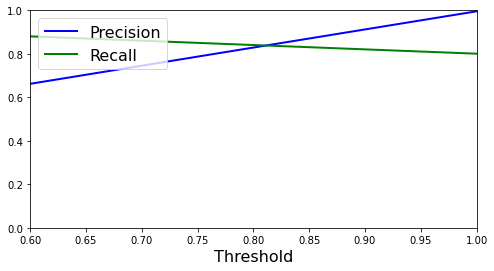

In [21]:
from matplotlib import pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([0.6, 1])

plt.show()

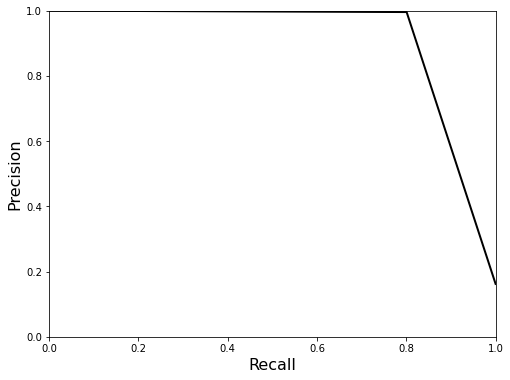

In [22]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "k-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

plt.show()

In [23]:
y_train_pred_90 = (y_scores > 0.8)

precision_score(y_train, y_train_pred_90), recall_score(y_train, y_train_pred_90)

(0.9956521739130435, 0.8006993006993007)

### Courbe ROC
Affichons la courbe roc afin de confronter notre taux de vrai positif par rapport au taux de faux positif. plus la courbe se rapproche du coin supérieur gauche, plus notre taux de vrai positif est idéal, et on évite un maximum de faux positif. On utilise l'air sous la courbe ROC afin de comparer nos modèles, qui doit être le plus proche de 1.

In [24]:
from sklearn.metrics import roc_curve

y_scores_forest = y_probas_forest[:, 1] 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

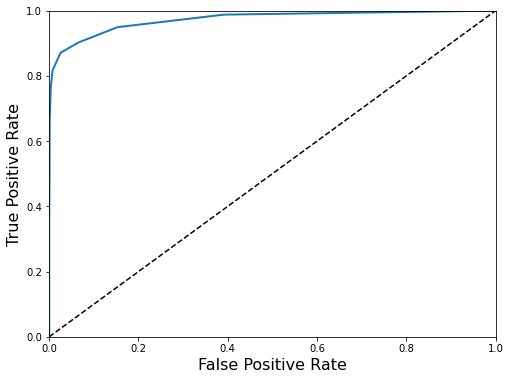

In [25]:
def plot_roc_curve(fpr_forest, tpr_forest):
    plt.plot(fpr_forest, tpr_forest, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest)
#save_fig("roc_curve_plot")
plt.show()

In [26]:
from sklearn.metrics import roc_auc_score #SOLUTION

roc_auc_score(y_train, y_scores) 

0.9000113553564163

In [13]:
np.save('variables/fpr_forest.npy', fpr_forest)
np.save('variables/tpr_forest.npy', tpr_forest)


In [19]:
import pickle
filename = 'variables/best_RF_clf.sav'
pickle.dump(best_RF_clf, open(filename, 'wb'))